## Observations and Insights 

In [209]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "/Users/michaelpeyser/Desktop/matplotlib/RUT-SOM-DATA-PT-06-2020-U-C/02-Homework/05-Matplotlib/Instructions/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "/Users/michaelpeyser/Desktop/matplotlib/RUT-SOM-DATA-PT-06-2020-U-C/02-Homework/05-Matplotlib/Instructions/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
mouse_study_df.head(25)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [9]:
# Checking the number of mice.
mouse_study_df["Mouse ID"].count()

1893

In [30]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse_id = mouse_study_df.loc[mouse_study_df.duplicated(subset=["Mouse ID","Timepoint",]),"Mouse ID"].unique()
dup_mouse_id


array(['g989'], dtype=object)

In [31]:
# Optional: Get all the data for the duplicate mouse ID. 



In [32]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = mouse_study_df[mouse_study_df["Mouse ID"].isin(dup_mouse_id)== False]
clean_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [34]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean_df = len(clean_mouse_df["Mouse ID"].unique())
num_mice_clean_df

248

## Summary Statistics

In [35]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

summary_stats = clean_mouse_df.groupby("Drug Regimen").agg(\
        tumor_volume_mean = ("Tumor Volume (mm3)", np.mean),\
        tumor_volume_median = ("Tumor Volume (mm3)", np.median),\
        tumor_volume_variance = ("Tumor Volume (mm3)", np.var),\
        tumor_volume_std = ("Tumor Volume (mm3)", np.std),\
        tumor_volume_sem = ("Tumor Volume (mm3)", st.sem),\
).round()

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [36]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats
# This method produces everything in a single groupby function


,tumor_volume_mean,tumor_volume_median,tumor_volume_variance,tumor_volume_std,tumor_volume_sem
Drug Regimen,,,,,
Capomulin,41.0,42.0,25.0,5.0,0.0
Ceftamin,53.0,52.0,39.0,6.0,0.0
Infubinol,53.0,52.0,43.0,7.0,0.0
Ketapril,55.0,54.0,69.0,8.0,1.0
Naftisol,54.0,53.0,66.0,8.0,1.0
Placebo,54.0,52.0,61.0,8.0,1.0
Propriva,52.0,50.0,44.0,7.0,1.0
Ramicane,40.0,41.0,23.0,5.0,0.0
Stelasyn,54.0,52.0,59.0,8.0,1.0


## Bar and Pie Charts

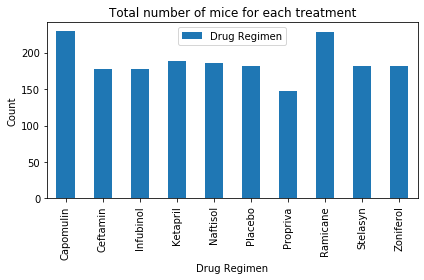

In [54]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
total_mice_treatment = clean_mouse_df.groupby("Drug Regimen")
total_mice_treatment_count = pd.DataFrame(total_mice_treatment["Drug Regimen"].count())
total_mice_chart = total_mice_treatment_count.plot(kind = "bar", title = "Total number of mice for each treatment")
total_mice_chart.set_xlabel("Drug Regimen")
total_mice_chart.set_ylabel("Count")
plt.tight_layout()

TypeError: only size-1 arrays can be converted to Python scalars

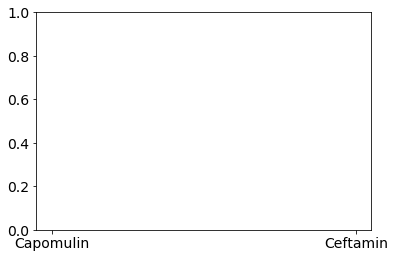

In [215]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
total_mice_treatment = clean_mouse_df["Drug Regimen"].value_counts()

y_axis = total_mice_treatment_count.values
x_axis = np.arange(0,len(y_axis),1)
drug_used = total_mice_treatment_count.index

plt.bar(drug_used, y_axis, color = "b", alpha = 0.5, align= "center", width = .5)

plt.ylabel = ("Count")
plt.xlabel = ("Drug Regimen")
plt.title = ("Total number of mice for each treatment")
plt.xticks(rotation = 90)

plt.show()


<function matplotlib.pyplot.show(*args, **kw)>

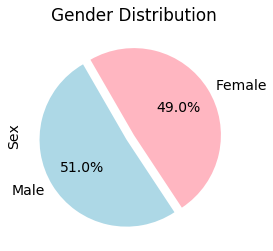

In [216]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = clean_mouse_df["Sex"].value_counts()
labels = gender_count.values
sizes = gender_count.values
colors = ["lightblue", "lightpink"]
explode = [0.1, 0]

gender_count.plot(kind= "pie", y='sex', title ="Gender Distribution", autopct= '%1.1f%%',explode=explode, colors=colors, startangle = 120,)

plt.show



TypeError: 'str' object is not callable

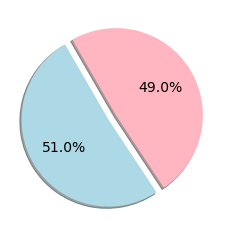

In [217]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = clean_mouse_df["Sex"].value_counts()
labels = gender_count.index
sizes = gender_count.values
colors = ["lightblue", "lightpink"]
explode = [0.1, 0]

plt.pie(sizes, autopct= '%1.1f%%',explode=explode, colors=colors, shadow=True, startangle = 120,)

plt.rcParams["font.size"] = 14
plt.title("Gender Distribution")
plt.ylabel("Sex")
plt.axis("Equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [218]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tf= clean_mouse_df.sort_values(["Timepoint"], ascending= True)
max_tf

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_grp_df= max_tf[["Mouse ID", "Timepoint"]].merge(clean_mouse_df, on= ["Mouse ID", "Timepoint"], how= "left")
merge_grp_df.round(2)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,k403,0,Ramicane,Male,21,16,45.00,0
1,n678,0,Propriva,Male,5,29,45.00,0
2,n763,0,Placebo,Female,16,25,45.00,0
3,v923,0,Capomulin,Female,19,21,45.00,0
4,w150,0,Capomulin,Male,23,23,45.00,0
...,...,...,...,...,...,...,...,...
1875,l733,45,Ceftamin,Female,4,30,64.30,1
1876,x402,45,Stelasyn,Male,21,28,61.62,3
1877,s508,45,Ramicane,Male,1,17,30.28,0
1878,g316,45,Capomulin,Female,22,22,40.16,2


In [219]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Ramicane", "Capomulin", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
     # Locate the rows which contain mice on each drug and get the tumor volumes

    
for x in treatment_list:
    treatment_data= merge_grp_df.loc[merge_grp_df["Drug Regimen"]== x]["Tumor Volume (mm3)"]
    tumor_vol_data_list.append(treatment_data)
    
    quartiles = treatment_data.quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    print(f"{x} potential outliers: {treatment_data.loc[(treatment_data < lower_bound)|(treatment_data > upper_bound )]}")


Ramicane potential outliers: 1767    22.050126
Name: Tumor Volume (mm3), dtype: float64
Capomulin potential outliers: 1628    25.472143
1792    23.343598
Name: Tumor Volume (mm3), dtype: float64
Infubinol potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


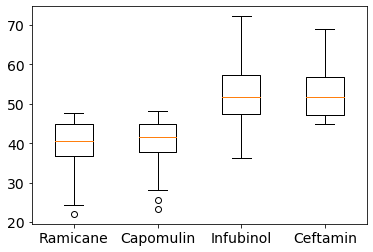

In [220]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_tumor_vol = drug_tumor_vol.reset_index()
tum_list= merge_grp_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].apply(list)
tum_list_df = pd.DataFrame(tum_list)
tum_list_df = tum_list_df.reindex(treatment_list)
tum_volume = [vol for vol in tum_list_df["Tumor Volume (mm3)"]]
plt.boxplot(tum_volume, labels = treatment_list)
plt.show()

## Line and Scatter Plots

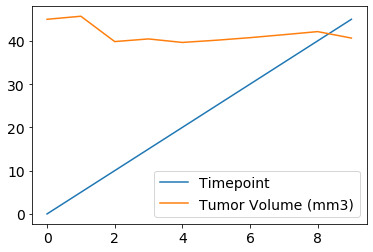

In [221]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
tp_tv_capo = merge_grp_df[merge_grp_df["Mouse ID"].isin(["v923"])]


tp_tv_capo_df = tp_tv_capo[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]


line_tp_tv_capo = tp_tv_capo_df.reset_index()


line_plt_capo = line_tp_tv_capo[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

line_plot = line_plt_capo.plot.line()

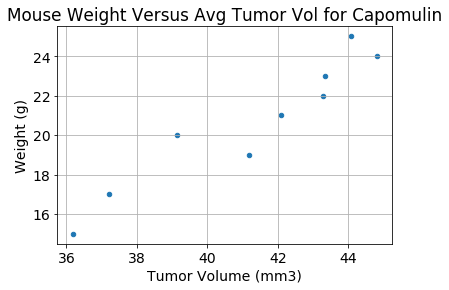

In [222]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capo_scat = merge_grp_df[merge_grp_df["Drug Regimen"].isin(["Capomulin"])]
capo_scat_df = merge_grp_df[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
capo_scat_df_sort = capo_scat_df.sort_values(["Weight (g)"], ascending=True)
capo_scatter_plot = capo_scat.reset_index()
capo_weight = capo_scatter_plot.groupby ("Weight (g)")["Tumor Volume (mm3)"].mean()
capo_plot = pd.DataFrame(capo_weight).reset_index()
capo_scat = capo_plot.plot(kind = "scatter", title= "Mouse Weight Versus Avg Tumor Vol for Capomulin", x= "Tumor Volume (mm3)", y="Weight (g)", grid=True)
capo_scat


## Correlation and Regression

The correlation between weight and tumor volume is 0.59


TypeError: 'str' object is not callable

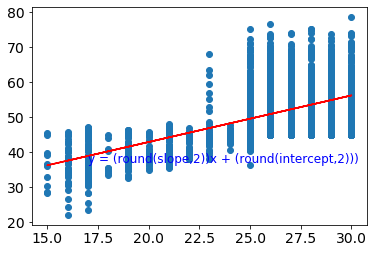

In [226]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(capo_scat_df["Weight (g)"], capo_scat_df["Tumor Volume (mm3)"])
print(f"The correlation between weight and tumor volume is {round(correlation[0],2)}")

x_values = capo_scat_df["Weight (g)"]
y_values = capo_scat_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr)= st.linregress(x_values, y_values)
reg_value= x_values * slope + intercept
line_eq = f"y = (round(slope,2))x + (round(intercept,2)))"
plt.scatter(x_values, y_values)
plt.plot(x_values, reg_value, "r-")
plt.annotate(line_eq, (17,37), fontsize=12, color="blue")
plt.title("Mouse Weight Versus Avg Tumor Vol for Capomulin")
plt.xlabel("Mouse Weight(g)")
plt.xlabel("Tumor Volume (mm3)")
plt.show()